###### IMPORT REQUIRED LIBRARY

In [1]:
#Importing required packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

# Importing sklearn packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

###### IMPORT DATASET

In [2]:
import os
os.chdir(r"C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\001_SUPERVISED_LEARNING\001_REGRESSION\002_POLYNOMIAL")

# Import data and view first few rows of in a dataframe
red_wine_df = pd.read_csv('winequality-red.csv')

# Let's preview the dataframe
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### ABOUT THE DATASET

###### Next step: Understanding the Variable Statistics

In [3]:
# Checking the number of records imported
len(red_wine_df.index)

1599

In [4]:
# Running descriptive statistics across all the variables
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Checking to see if there's any null variables
red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# listing the unique values for the wine quality
red_wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

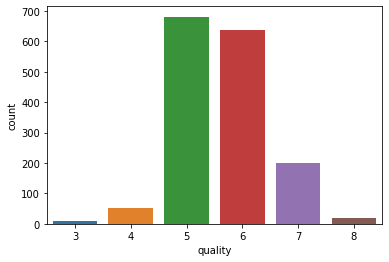

In [7]:
# Taking a look at the quality ranges
sb.countplot(x='quality', data=red_wine_df)

In [10]:
# generating charts that compare all of the variables against quality,
# although not necessary, it's good to understand the data spread.

df1 = red_wine_df.select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sb.barplot(x='quality', y = col, data=df1)

ValueError: Could not interpret input 'quality'

<Figure size 432x288 with 0 Axes>

###### Preprocessing data before for Modeling

###### 1. Spliting the quality column into "good" and "bad"

In [11]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red_wine_df['quality'] = pd.cut(red_wine_df['quality'], bins = bins, labels = group_names)

In [12]:
# Assigning a label to our quality variable
label_quality = LabelEncoder()

# Now changing our dataframe to reflect our new label
red_wine_df['quality'] = label_quality.fit_transform(red_wine_df['quality'])

In [14]:
# printing the head to ensure the transformation happened
red_wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


###### 2. SPLIT DATASET INTO TRAINING & TESTING SET

In [24]:
# Extracting all model inputs from the data set
all_inputs = red_wine_df[['fixed acidity', 'volatile acidity',
                          'citric acid', 'residual sugar',
                          'chlorides', 'free sulfur dioxide',
                          'total sulfur dioxide', 'density',
                          'pH', 'sulphates', 'alcohol']].values

# Extracting quality labels
all_labels = red_wine_df['quality'].values

# a test to see what the inputs look like, we will check top 2 ROWS
pd.DataFrame(all_inputs[:2])

,0,1,2,3,4,5,6,7,8,9,10
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [26]:
sc = StandardScaler()
all_inputs_scaled = sc.fit_transform(all_inputs)

In [25]:
pd.DataFrame(all_inputs)

,0,1,2,3,4,5,6,7,8,9,10
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [35]:
all_inputs_scaled_df = pd.DataFrame(all_inputs_scaled)

In [36]:
all_inputs_scaled_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [32]:
all_inputs_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [31]:
all_inputs_df = pd.DataFrame(all_inputs, columns = ['fixed acidity', 'volatile acidity',
                                                    'citric acid', 'residual sugar',
                                                    'chlorides', 'free sulfur dioxide',
                                                    'total sulfur dioxide', 'density',
                                                    'pH', 'sulphates', 'alcohol'])

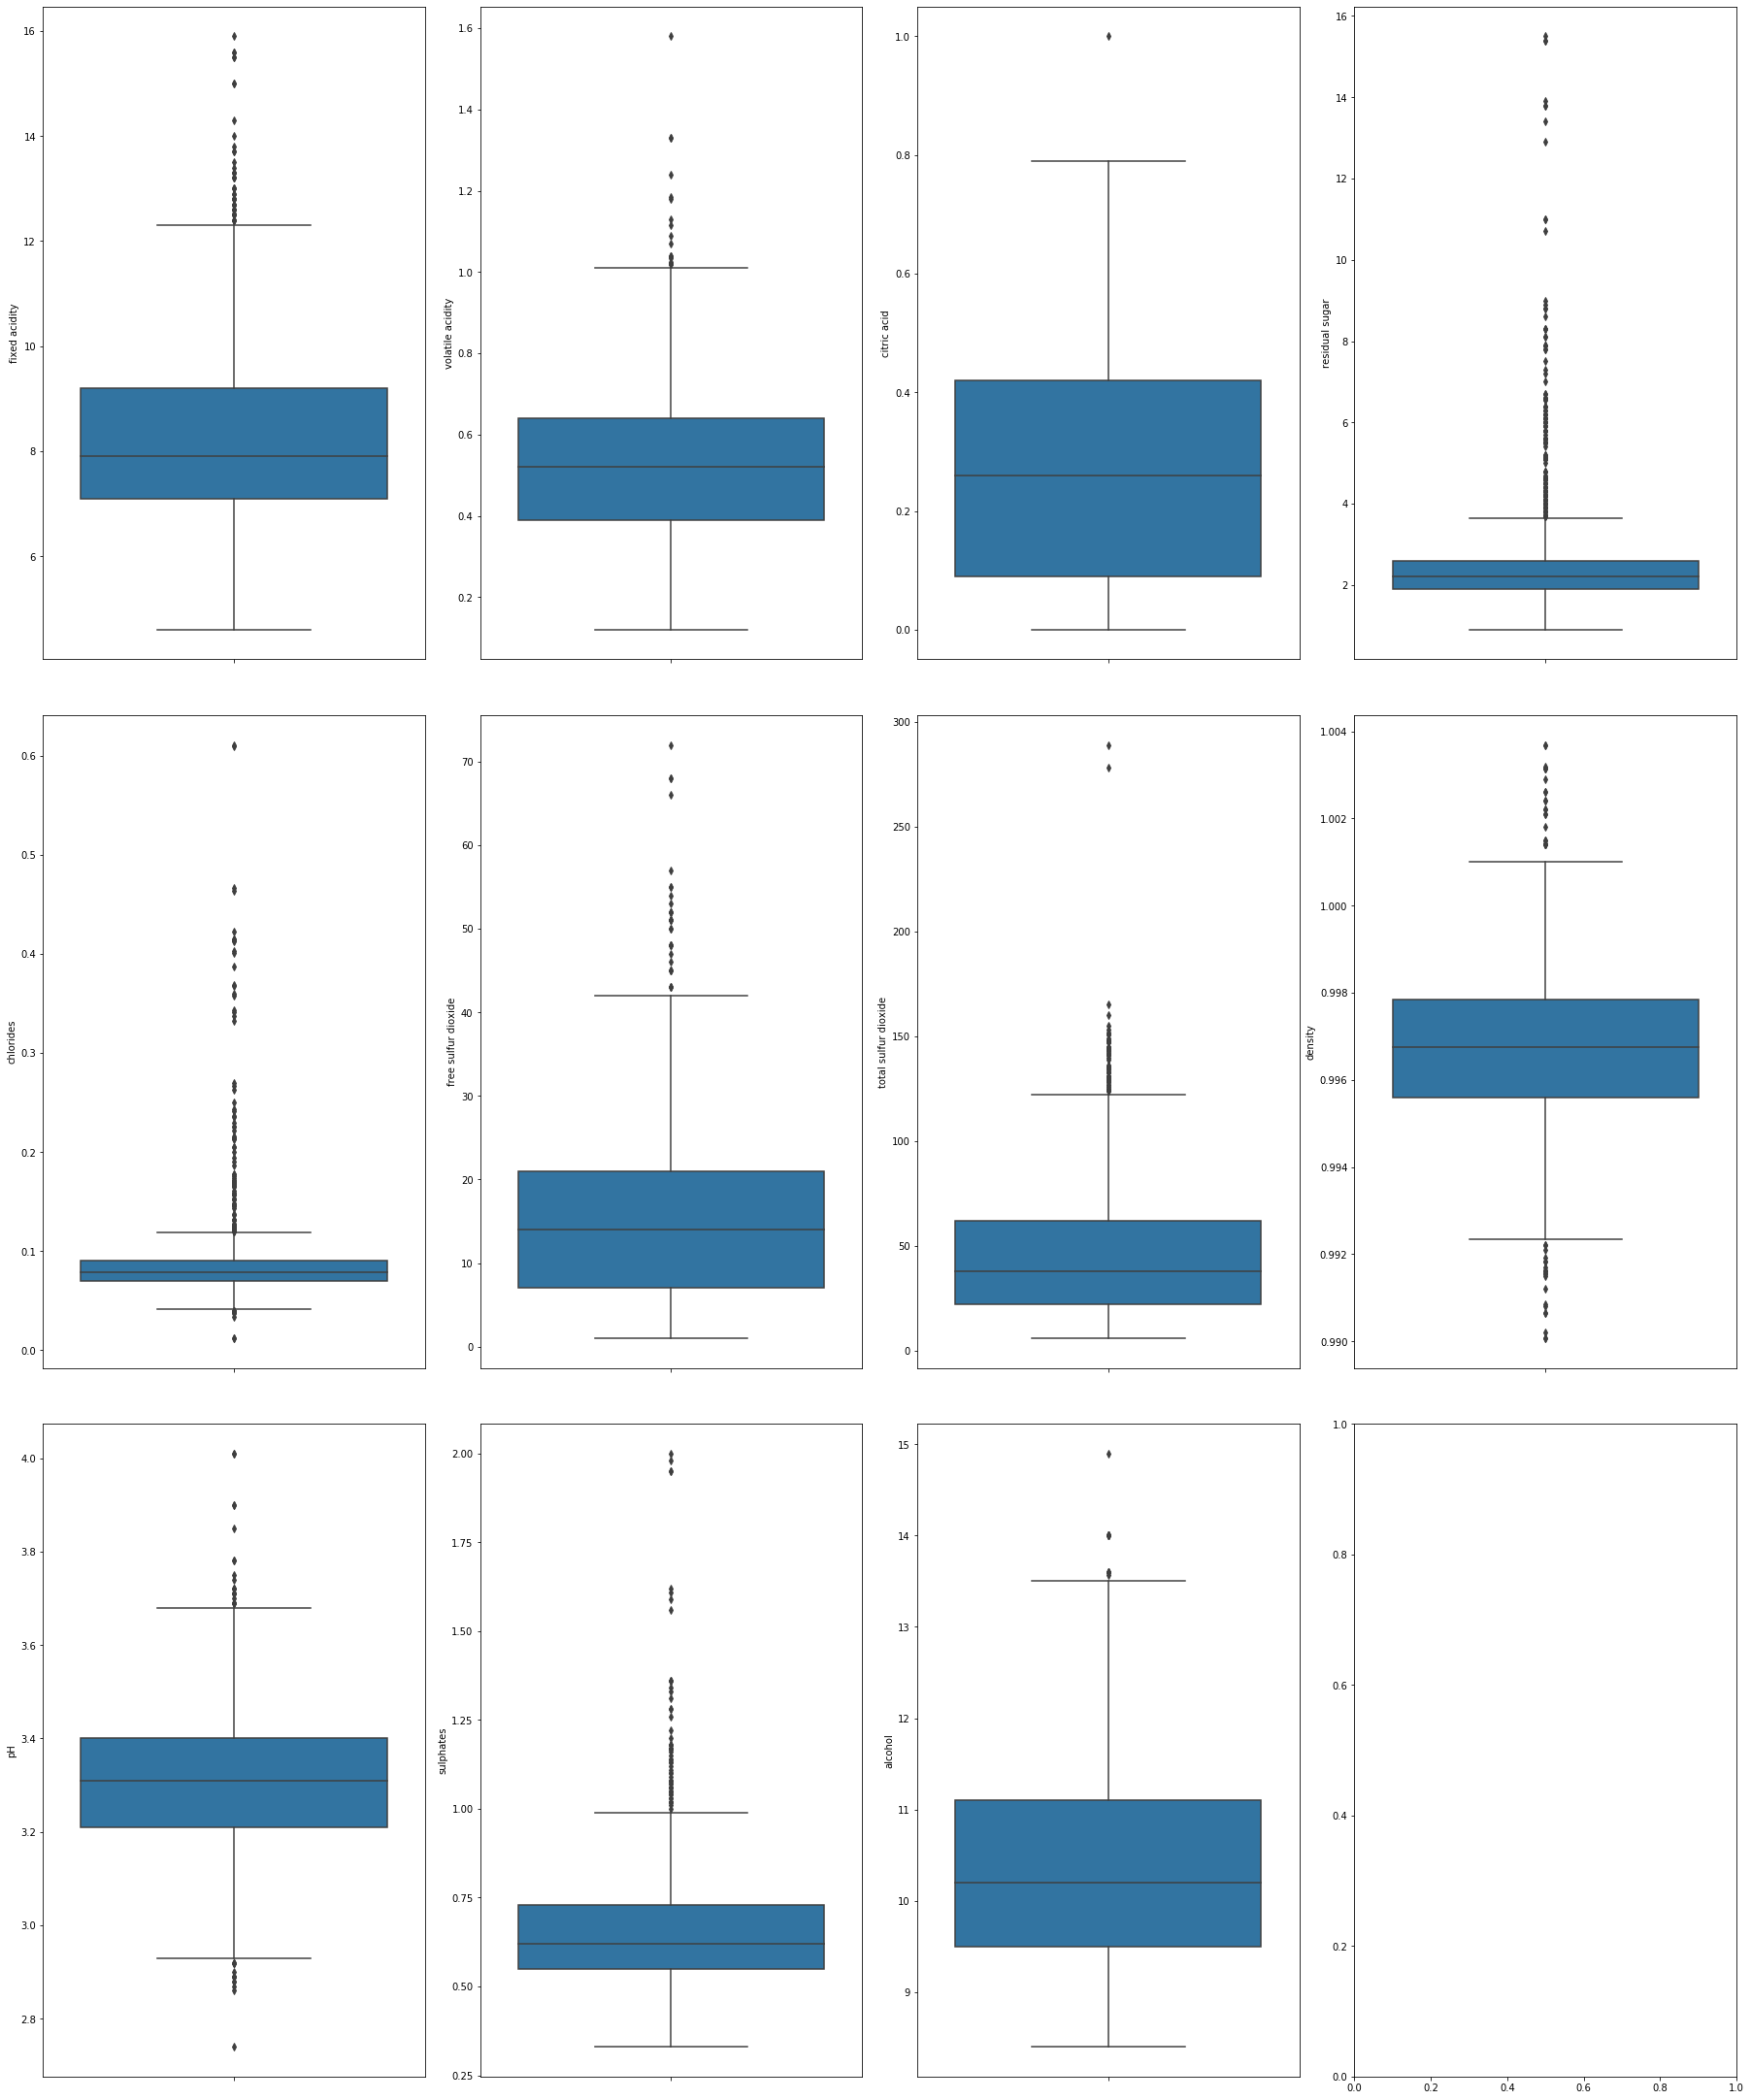

In [33]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in all_inputs_df.items():
    sb.boxplot(y=col, data=all_inputs_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

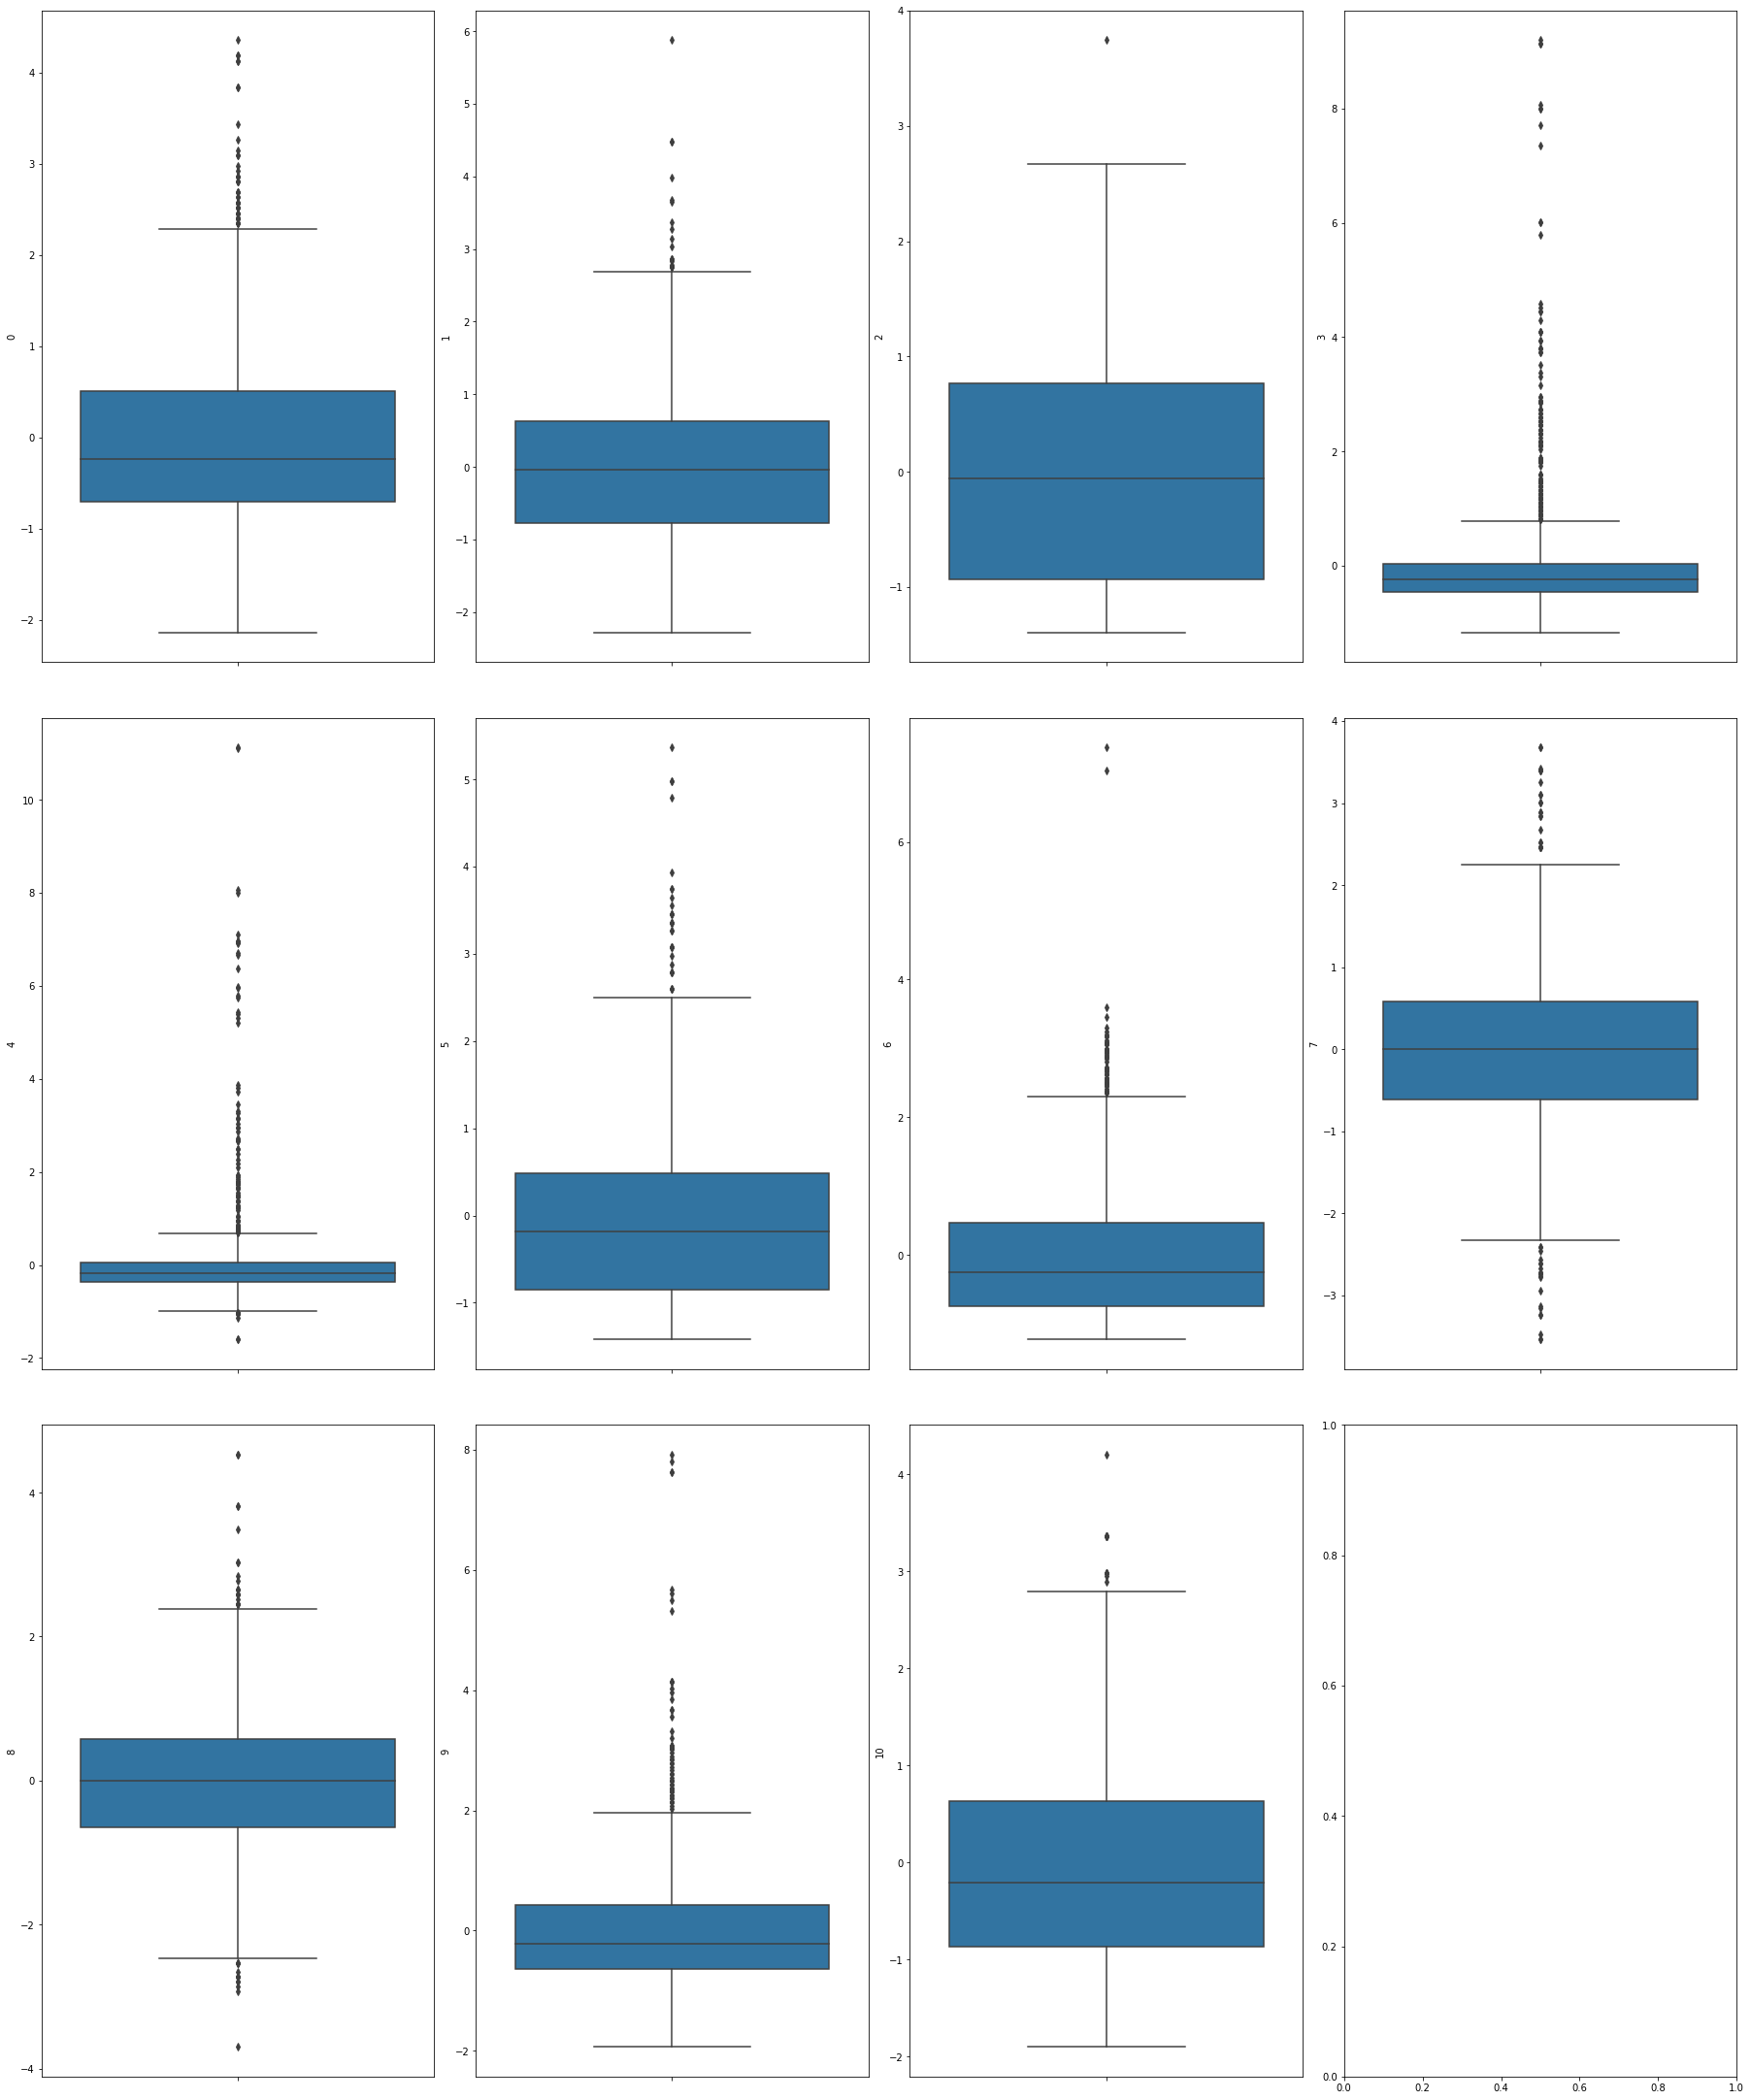

In [37]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in all_inputs_scaled_df.items():
    sb.boxplot(y=col, data=all_inputs_scaled_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [38]:
(training_inputs, 
 testing_inputs, 
 training_classes,
 testing_classes) = train_test_split(all_inputs,
                                     all_labels,
                                     test_size = 0.25,
                                     random_state = 422)

###### MODELING

In [39]:
# trying Decision Tree Classfier 
from sklearn.tree import DecisionTreeClassifier

# Create the Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.8725

###### MULTIPLE MODEL EXPERIMENTATION

In [72]:
# Selecting the models and the model names in an array

models = [LogisticRegression(max_iter = 1200),
          
          LinearSVC(max_iter = 10000),
          
          SVC(kernel = 'rbf', gamma = 10),
          
          KNeighborsClassifier(algorithm = 'auto', leaf_size = 50, metric = 'minkowski',
                               metric_params = None, n_jobs = 1, n_neighbors = 4,
                               p = 2, weights = 'uniform'),
          
          RandomForestClassifier(max_depth = 10, n_estimators = 24, random_state = 422),
          
          DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 7, min_samples_split = 6),
          
          GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 100, min_samples_split = 500, min_samples_leaf = 50,
                                     max_depth = 8, max_features = 'sqrt', subsample = 0.8, random_state = 422),
          
          GaussianNB(var_smoothing = 2e-9)]

model_names = ['Logistic Regression',
               'Linear SVM',
               'rbf SVM',
               'K-Nearest Neighbors',
               'Random Forest Classifier',
               'Decision Tree',
               'Gradient Boosting Classifier',
               'Gaussian NB']

# Creating an accuracy array and a matrix to join the accuracy of the models & the name of the models,
# so we can read the results easier

acc = [] # Accuracy Array
m = {}   # Matrix

# Next we're going to iterate through the models, and get the accuracy for each
for model in range(len(models)):
    clf = models[model]
    clf.fit(training_inputs,training_classes)
    pred = clf.predict(testing_inputs)
    acc.append(accuracy_score(pred, testing_classes))

m = {'Algorithm':model_names,'Accuracy':acc}

# just putting the matrix into a data frame and listing out the results
acc_frame = pd.DataFrame(m)
acc_frame

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Algorithm,Accuracy
0,Logistic Regression,0.8825
1,Linear SVM,0.8775
2,rbf SVM,0.8975
3,K-Nearest Neighbors,0.8750
4,Random Forest Classifier,0.9100
5,Decision Tree,0.8750
6,Gradient Boosting Classifier,0.8950
7,Gaussian NB,0.8425


In [73]:
random_forest_classifier = RandomForestClassifier()

# Setting up the parameters for our grid search. You can check out what each of these parameters mean on the Scikit webiste!
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
parameter_grid = {'n_estimators': [10, 25, 50, 100, 200],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

# Stratified K-Folds cross-validator allows us mix up the given test/train data per run
# with k-folds each test set should not overlap across all shuffles.
# This allows us to ultimately have "more" test data for our model
cross_validation = StratifiedKFold(n_splits = 10)

# Running the grid search function with our random_forest_classifer, 
# our parameter grid defineda bove, and our cross validation method
grid_search = GridSearchCV(random_forest_classifier,
                           param_grid = parameter_grid,
                           cv = cross_validation)

# Using the defined grid search above, we're going to test it out on our data set
grid_search.fit(all_inputs, all_labels)

# Printing the best scores, parameters, and estimator for our Random Forest classifer
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.883687106918239
Best parameters: {'criterion': 'entropy', 'max_features': 1, 'n_estimators': 25}


RandomForestClassifier(criterion='entropy', max_features=1, n_estimators=25)

In [74]:
RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'entropy',
                       max_depth = None, max_features = 2, max_leaf_nodes = None,
                       min_impurity_decrease = 0.0, min_impurity_split = None,
                       min_samples_leaf = 1, min_samples_split = 2,
                       min_weight_fraction_leaf = 0.0, n_estimators = 50, n_jobs = 1,
                       oob_score = False, random_state = None, verbose = 0,
                       warm_start = False)

RandomForestClassifier(criterion='entropy', max_features=2, n_estimators=50,
                       n_jobs=1)

In [75]:
#Now we can take the best classifier from the Grid Search and use that for our classifer
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv = 10),
                      'classifier': ['Random Forest'] * 10})
rf_df.mean()

accuracy    0.878054
dtype: float64

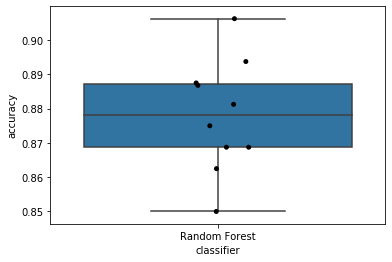

In [76]:
# Plotting our accuracy results!!
sb.boxplot(x = 'classifier', y = 'accuracy', data = rf_df)
sb.stripplot(x = 'classifier', y = 'accuracy', data = rf_df, jitter = True, color = 'black')